In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [131]:
df=pd.read_csv(r'C:\Users\Moses\Downloads\data.csv\IDMB_webscrap_Dataset.csv')

In [132]:
df

,Unnamed: 0,Movie_Name,Release_Year,Time_mnts,Movie_type,Ratings,Metascore,Votes,Gross_$
0,0,The Shawshank Redemption,1994,142,Drama,9.3,81,2638889,28340000
1,1,The Godfather,1972,175,"Crime, Drama",9.2,100,1829116,134970000
2,3,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,84,2610455,534860000
3,4,The Lord of the Rings: The Return of the King,2003,201,"Action, Adventure, Drama",9.0,94,1814282,377850000
4,5,Schindler's List,1993,195,"Biography, Drama, History",9.0,94,1338094,96900000
...,...,...,...,...,...,...,...,...,...
489,695,Back to the Future Part II,1989,108,"Adventure, Comedy, Sci-Fi",7.8,57,526960,118500000
490,696,Mississippi Burning,1988,128,"Crime, Drama, History",7.8,65,100717,34600000
491,697,Predator,1987,107,"Action, Adventure, Horror",7.8,46,419316,59740000
492,698,Ferris Bueller's Day Off,1986,103,Comedy,7.8,61,355415,70140000


In [133]:
df.Movie_type[4]

'Biography, Drama, History            '

In [134]:
po=re.compile('\D+Drama')
po.search(df.Movie_type[491]).group()

AttributeError: 'NoneType' object has no attribute 'group'

In [135]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [136]:
df

,Movie_Name,Release_Year,Time_mnts,Movie_type,Ratings,Metascore,Votes,Gross_$
0,The Shawshank Redemption,1994,142,Drama,9.3,81,2638889,28340000
1,The Godfather,1972,175,"Crime, Drama",9.2,100,1829116,134970000
2,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,84,2610455,534860000
3,The Lord of the Rings: The Return of the King,2003,201,"Action, Adventure, Drama",9.0,94,1814282,377850000
4,Schindler's List,1993,195,"Biography, Drama, History",9.0,94,1338094,96900000
...,...,...,...,...,...,...,...,...
489,Back to the Future Part II,1989,108,"Adventure, Comedy, Sci-Fi",7.8,57,526960,118500000
490,Mississippi Burning,1988,128,"Crime, Drama, History",7.8,65,100717,34600000
491,Predator,1987,107,"Action, Adventure, Horror",7.8,46,419316,59740000
492,Ferris Bueller's Day Off,1986,103,Comedy,7.8,61,355415,70140000


In [137]:
df.Movie_type.value_counts().head(60)

Drama                                       42
Drama, Romance                              19
Crime, Drama                                19
Crime, Drama, Thriller                      16
Action, Adventure, Sci-Fi                   15
Animation, Adventure, Comedy                15
Crime, Drama, Mystery                       13
Comedy, Drama                               13
Biography, Drama                            12
Action, Adventure, Drama                    11
Biography, Drama, History                   11
Action, Crime, Drama                        10
Biography, Crime, Drama                     10
Comedy, Drama, Romance                       9
Drama, War                                   9
Animation, Action, Adventure                 8
Drama, Mystery, Thriller                     7
Action, Adventure, Fantasy                   6
Comedy, Crime, Drama                         6
Drama, Fantasy, Romance                      5
Drama, Sport                                 4
Drama, Romanc

## Univariate

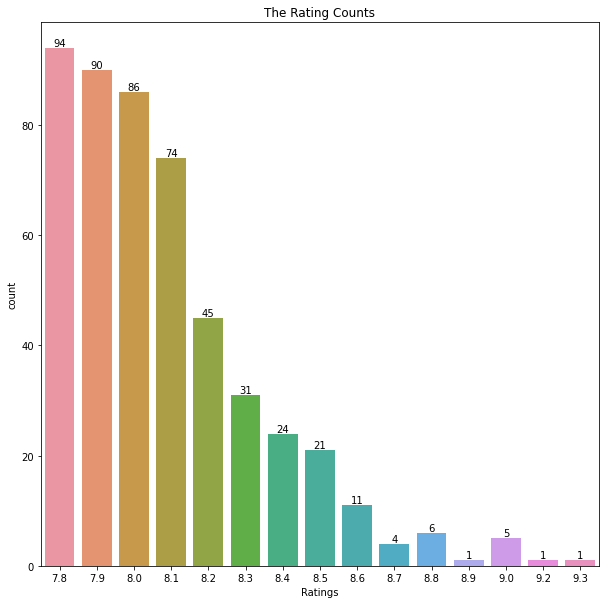

In [32]:
plt.figure(figsize=(10,10))
plt.title("The Rating Counts")
ax=sns.countplot(x='Ratings',data=df)
for container in ax.containers:
    ax.bar_label(container)

> highest rating count is 7.8 with 94\
> Lowest rating count is 8.9,9.2 and 9.3 with one time only

C:\Users\Moses\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


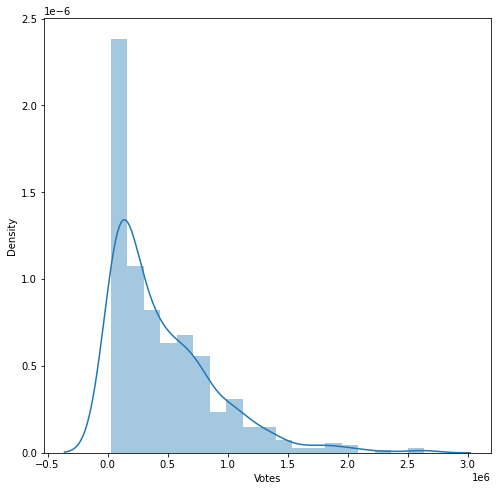

In [27]:
plt.figure(figsize=(8,8))
sns.distplot(df['Votes'])
plt.show()

> Most of the votes are densed below 0.5

C:\Users\Moses\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


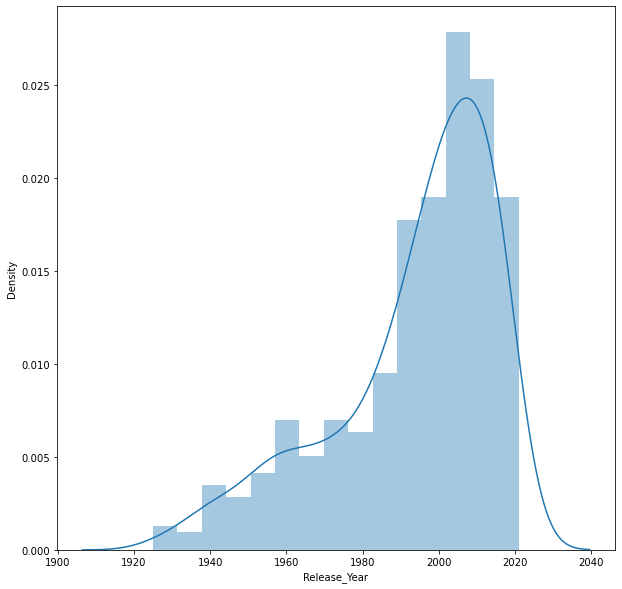

In [28]:
plt.figure(figsize=(10,10))
sns.distplot(df['Release_Year'])
plt.show()

> The Highest Movies were released in between 2000 and 2020

In [111]:
df.Movie_type.value_counts().tail(5)

Animation, Comedy, Family                  1
Drama, Musical, Sport                      1
Crime, Drama, Fantasy                      1
Adventure, Fantasy, Mystery                1
Action, Adventure, Horror                  1
Name: Movie_type, dtype: int64

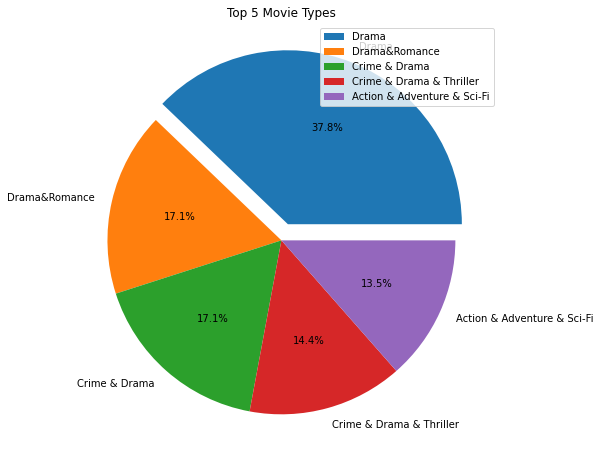

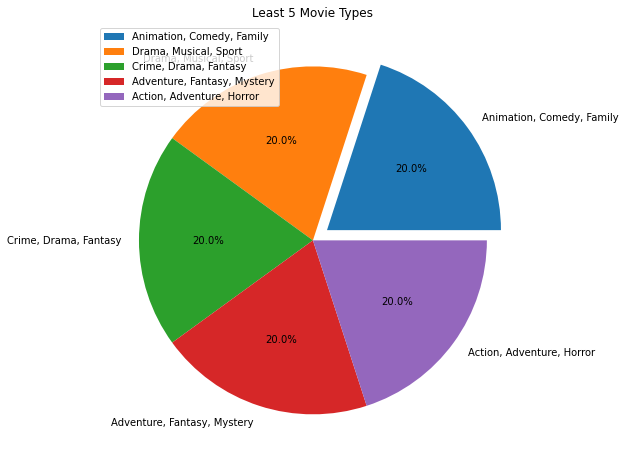

In [112]:


plt.figure(figsize=(8,8))
a=df.Movie_type.value_counts().head(5)
b=['Drama','Drama&Romance','Crime & Drama','Crime & Drama & Thriller','Action & Adventure & Sci-Fi']
explode=[0.1,0,0,0,0]
plt.pie(a,labels=b,autopct='%1.1f%%',explode=explode)
plt.title("Top 5 Movie Types")
plt.legend()
plt.show()

plt.figure(figsize=(8,8))
a=df.Movie_type.value_counts().tail(5)
b=['Animation, Comedy, Family','Drama, Musical, Sport','Crime, Drama, Fantasy','Adventure, Fantasy, Mystery','Action, Adventure, Horror']
explode=[0.1,0,0,0,0]
plt.pie(a,labels=b,autopct='%1.1f%%',explode=explode)
plt.title("Least 5 Movie Types")
plt.legend()
plt.show()

> Drama movies are highest in top 5 movie types with 37.8%\
> In least all movies are equal

# Bivariate

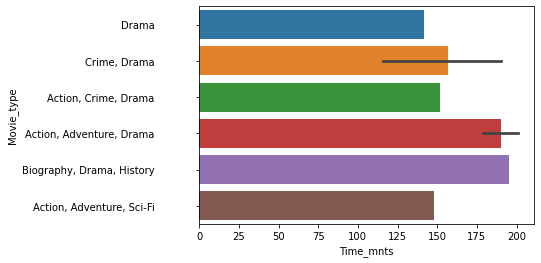

In [102]:
sns.barplot(x='Time_mnts',y='Movie_type',data=df.head(10))
plt.show()

> The Biography,Drama and History movies are taking more time\
> Drama and Action,Adventure,Sci-Fi movies are taking less time

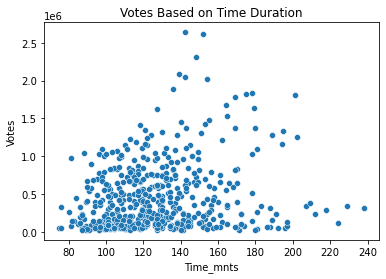

In [54]:
sns.scatterplot(x='Time_mnts',y='Votes',data=df)
plt.title('Votes Based on Time Duration')
plt.show()

> Most of the 1% votes are given to below 160mnts in time duration movies

In [129]:
df

,Gross_$
Movie_Name,
A Space Odyssey,56950000
Angry Men,4360000
Idiots,6530000
Years a Slave,56670000
"luni,",1190000
...,...
Ying xiong,53710000
Young Frankenstein,86300000
Z,80000


C:\Users\Moses\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


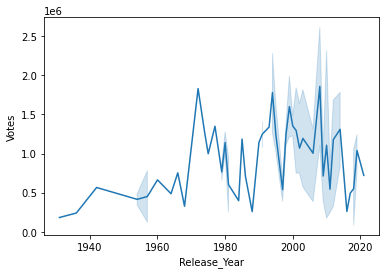

In [148]:
sns.lineplot(df.Release_Year.head(80),df.Votes.head(80))
plt.show()

> when year is increasing the votes also increasing

C:\Users\Moses\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


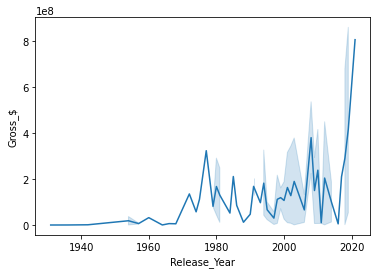

In [149]:
sns.lineplot(df.Release_Year.head(80),df['Gross_$'].head(80))
plt.show()

> When year is increasing the Gross also increasing 

# Multivariate

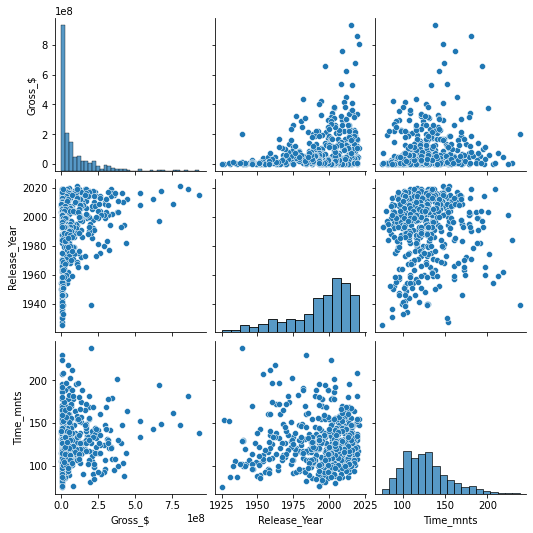

In [43]:
sns.pairplot(df[['Gross_$','Release_Year','Time_mnts']])
plt.show()

> when the year of releasing movies is increasing the gross also increasing\
> The most of the movies which are at 150 mnts are getting approximately 2M dollors\
> Even from all the year wise comparing the most of the movies are in between 100 to 150 mnts

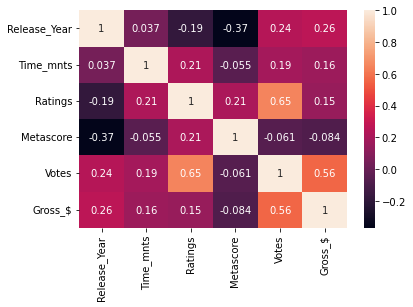

In [44]:
sns.heatmap(df.corr(),annot=True)
plt.show()

> Gross is moderatively positve correlated with Votes, higly negative correlated with Metascore,very weak positvely correlated with Ratings, very weak positively correlated with Time_mnts and weak positively correlated with Released year
> Released year very weak positively correlated with time minutes,very weak negatively correlated with Ratings,Moderately negatively correlated with Metascore,Moderate positvely correlated with Votes and weak positively correlated with gross 